In [1]:
from si import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
df = pandas.read_csv("./df.csv",delimiter="|")
df.head()

,Unnamed: 0,run,splash,bump,scalefactor
0,0,26764,NaN,NaN,0.0
1,1,28623,NaN,NaN,0.0
2,2,28966,0.0,0.0,475.0
3,3,29011,NaN,NaN,0.0
4,4,29065,NaN,NaN,0.0


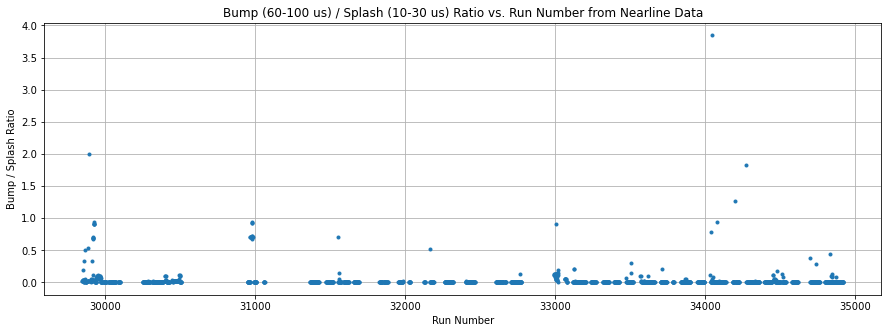

In [3]:
fig,ax = plt.subplots(figsize=(15,5))
plt.title("Bump (60-100 us) / Splash (10-30 us) Ratio vs. Run Number from Nearline Data")
plt.xlabel("Run Number")
plt.ylabel("Bump / Splash Ratio")
plt.plot(df['run'], df['bump']/df['splash'], ".")
plt.grid()
plt.show()

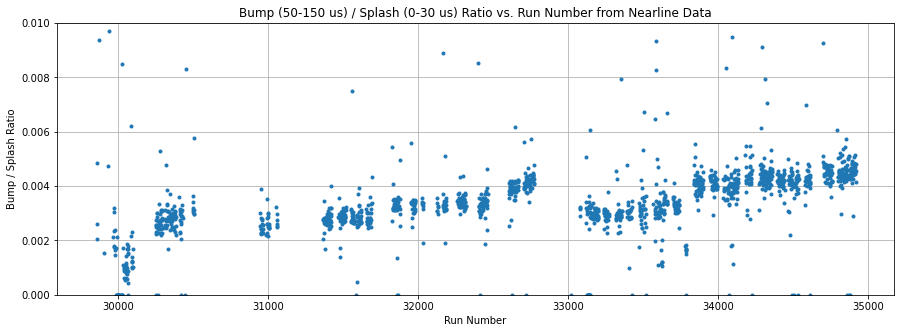

In [4]:
fig,ax = plt.subplots(figsize=(15,5))
plt.title("Bump (50-150 us) / Splash (0-30 us) Ratio vs. Run Number from Nearline Data")
plt.xlabel("Run Number")
plt.ylabel("Bump / Splash Ratio")
plt.plot(df['run'], df['bump']/df['splash'], ".")
plt.grid()
plt.ylim(0,0.01)
plt.show()

In [5]:
f = r.TFile("./out.root")
f.ls()

TFile**		./out.root	
 TFile*		./out.root	
  KEY: TH1D	h_26764;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_28623;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_28966;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29011;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29065;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29106;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29351;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29480;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29481;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29640;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29641;1	Triple Coincidence: cluster time vs calo num y projection
  KEY: TH1D	h_29642;1	Triple Coincidence: cluster time vs calo num y projectio

26764.0
28623.0
28966.0
29011.0
29065.0
29106.0
29351.0
29480.0
29481.0
29640.0
29641.0
29642.0
29643.0
29644.0
29645.0
29647.0
29648.0
29653.0
29690.0
29693.0
29695.0
29697.0
29722.0
29723.0
29724.0
29727.0
29728.0
29729.0
29730.0
29732.0
29733.0
29734.0
29735.0
29737.0
29769.0
29771.0
29774.0
29780.0
29782.0
29784.0
29785.0
29800.0
29801.0
29802.0
29803.0
29804.0
29805.0
29806.0
29807.0
29808.0
29809.0
29810.0
29811.0
29812.0
29813.0
29814.0
29815.0
29816.0
29817.0
29818.0
29819.0
29851.0
Name: h3_y Title: Triple Coincidence: cluster time vs calo num y projection NbinsX: 1000
29852.0
Name: h3_y Title: Triple Coincidence: cluster time vs calo num y projection NbinsX: 1000
29853.0
Name: h3_y Title: Triple Coincidence: cluster time vs calo num y projection NbinsX: 1000
29854.0
Name: h3_y Title: Triple Coincidence: cluster time vs calo num y projection NbinsX: 1000
29855.0
Name: h3_y Title: Triple Coincidence: cluster time vs calo num y projection NbinsX: 1000
29856.0
Name: h3_y Title: T

Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29851.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29852.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29853.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29854.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29855.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29856.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29857.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29858.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29859.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29860.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29861.png has been created
Info in <TCanvas::Print>: png file ./images/MuonLoss_Run_29866.png has been 

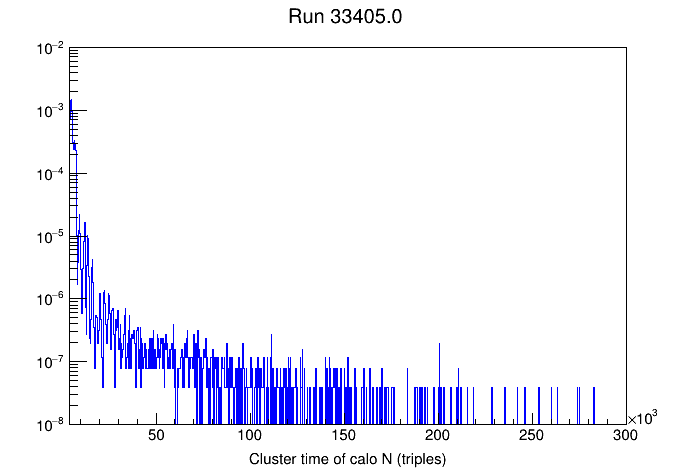

In [8]:
os.system("rm -f ./images/MuonLoss_Run_*png")
for i, row in df.iterrows():
#     print(row['run'])
    if(row['bump'] > 0):
        h = f.Get("h_"+str(int(row['run'])))
#         print(h)
        c = r.TCanvas()
        h.SetTitle("Run "+str(int(row['run'])))
        h.GetYaxis().SetRangeUser(10**(-8), 10**(-2))
        h.Draw("hist")
        c.SetLogy()
        c.Draw()
        c.Print("./images/MuonLoss_Run_"+str(int(row['run']))+".png")
#         break